# Creating gloss vector from nltk corpus (brown)

Experiment to check out on smaller scale

In [1]:
import numpy as np
import scipy
from scipy.sparse import bsr_matrix
import nltk.corpus
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt

In [2]:
# Position surrounding word
num_pos = 4
keyword = "serve"

In [3]:
word_list = nltk.corpus.brown.words()
filtered_words = [word for word in word_list if word not in nltk.corpus.stopwords.words('english')]

In [4]:
print(len(filtered_words))

727501


In [5]:
indices = [i for i, x in enumerate(filtered_words) if x == keyword]
print(len(indices))

103


In [6]:
tokenizer = RegexpTokenizer(r'\w+')
just_words = tokenizer.tokenize(" ".join(word_list))
just_words = [x.lower() for x in just_words]
unique_words = list(set(just_words))
print(unique_words)

['polarize', 'breve', 'askin', 'proudest', 'madeleine', 'fuzz', 'sociologist', 'shipment', 'haijac', 'transferor', 'icelandic', 'canute', 'beers', 'nickels', 'baccarat', 'boisterous', 'hermeneutics', 'janet', 'preparatory', 'accidentally', 'leather', 'bela', 'alignment', 'lateran', '1991', 'myrtle', 'congregational', 'motet', 'coordinates', 'indicative', 'carvalho', 'announcing', 'heathen', 'overheat', 'unreliable', 'contingency', 'compulsory', 'somebody', 'tunneled', 'sussex', 'downed', 'endurance', 'mcnear', 'polyelectrolytes', 'memorial', 'tar', 'conversant', 'paragon', '229', 'bylot', 'eyesight', 'bottineau', 'reshaped', 'footman', 'bursting', 'bellboy', 'setbacks', 'harper', 'walrus', 'exasperated', 'madrigal', 'supra', '1714', 'albacore', 'pushing', 'tighter', 'zombies', 'sicilians', 'underwriters', 'desuetude', 'romulo', 'rustproof', 'sculptors', 'princes', 'messing', 'iyokom', 'mascara', 'hartes', 'pluralistic', 'neutrophils', 'scrutin', 'friendships', 'adjusting', 'sponsored',

In [7]:
print(len(unique_words))

42432


In [8]:
filtered_words_cp = filtered_words.copy()
print(filtered_words_cp[360:370])
print(filtered_words_cp[43340:43350])
index = filtered_words_cp.index(keyword)
print(index)
filtered_words_cp.pop(index)
index = filtered_words_cp.index(keyword)
print(index)

['committee', '.', '``', 'These', 'actions', 'serve', 'protect', 'fact', 'effect', "court's"]
["SMU's", 'food', 'wrangler', ',', 'buys', 'enough', 'groceries', 'serve', '32,000', 'meals']
365
43346


In [9]:
gloss_vector = np.zeros(len(unique_words))

In [10]:
indices = [i for i, x in enumerate(filtered_words) if x == keyword]
words_around = []
for i in indices:
    words_around.extend(filtered_words[i - num_pos : i])
    words_around.extend(filtered_words[i + 1 : i + num_pos + 1])

print(words_around)

['.', '``', 'These', 'actions', 'protect', 'fact', 'effect', "court's", ',', 'buys', 'enough', 'groceries', '32,000', 'meals', 'week', '.', 'like', 'high', 'schoolers', 'wife', 'advisors', 'First', 'Presbyterian', 'Church', '.', 'Regional', 'representatives', 'appointed', 'section', 'country', 'include', 'Frank', ',', 'oldest', 'man', 'ever', 'Senate', '.', 'The', 'famous', 'libraries', 'two', 'counties', 'combine', 'large', ',', 'sparsely', 'populated', 'resources', 'rapidly', 'growing', 'territory', '.', 'Both', 'types', ',', 'Italian', 'airmen', 'went', 'Congo', 'cause', 'peace', 'United', 'Nations', 'state', 'yield', 'sovereignty', 'agencies', '.', 'The', 'people', ',', 'Cunard', 'Eagle', 'Airways', 'applied', 'New', 'York', '.', 'The', 'Christians', 'Jews', ',', 'asked', 'committee', 'fund', '.', 'It', 'reference', 'resolution', 'commend', 'citizens', 'judges', 'election', 'properly', 'discharge', 'learned', 'manipulate', 'present', 'stereotype', 'ends', '.', 'The', 'objective', '

In [11]:
for word in words_around:
    if word in unique_words:
        index = unique_words.index(word)
        gloss_vector[index] += 1
        
print(gloss_vector)

[0. 0. 0. ... 0. 0. 0.]


In [12]:
indices = [i for i, x in enumerate(gloss_vector) if x > 0]
for i in indices:
    print(unique_words[i], ": ", gloss_vector[i])

children :  1.0
director :  1.0
president :  2.0
teamed :  1.0
trustees :  1.0
discharge :  1.0
capacities :  1.0
coffee :  1.0
concessionaires :  1.0
epicure :  1.0
intentions :  1.0
great :  1.0
disciplined :  1.0
ones :  1.0
1 :  1.0
chairman :  1.0
south :  1.0
lights :  1.0
throughout :  1.0
wheat :  1.0
loss :  1.0
chosen :  1.0
travesty :  1.0
merger :  1.0
wish :  1.0
source :  1.0
oldest :  1.0
salads :  1.0
talent :  1.0
instrument :  1.0
entire :  2.0
effect :  1.0
room :  1.0
immediate :  1.0
drapery :  1.0
revival :  1.0
1937 :  1.0
burial :  1.0
brown :  1.0
make :  1.0
greater :  1.0
tentative :  1.0
indigenous :  1.0
obedience :  1.0
bridge :  1.0
sense :  1.0
successful :  1.0
schoolboys :  1.0
justice :  1.0
two :  1.0
retrieved :  1.0
shown :  1.0
man :  1.0
local :  1.0
6 :  1.0
companies :  1.0
best :  4.0
show :  1.0
ever :  1.0
election :  1.0
types :  1.0
studied :  1.0
several :  2.0
fully :  1.0
based :  1.0
plans :  1.0
meaningful :  1.0
return :  1.0
three :

In [15]:
print(gloss_vector[unique_words.index("tennis")])
print(gloss_vector[unique_words.index("purpose")])
print(gloss_vector[unique_words.index("bird")])
print(gloss_vector[unique_words.index("dinner")])
print(gloss_vector[unique_words.index("lunch")])
print(gloss_vector[unique_words.index("breakfast")])
print(gloss_vector[unique_words.index("food")])
print(gloss_vector[unique_words.index("waiter")])
print(gloss_vector[unique_words.index("restaurant")])

0.0
4.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0


In [16]:
from nltk.corpus import wordnet as wn
c = 0
for ss in wn.all_synsets():
    # ss = wn.synset("dog")
    print(ss)
    #print(ss.attributes())
    #print(ss.also_sees())
    print(ss.causes())
    #print(ss.closure())
    #print(ss.common_hypernyms())
    print(ss.definition())
    print(ss.entailments())
    print(ss.examples())
    print(ss.frame_ids())
    print(ss.hypernym_distances())
    print(ss.hypernym_paths())
    print(ss.hypernyms())
    print(ss.hyponyms())
    print(ss.instance_hypernyms())
    print(ss.instance_hyponyms())
    #print(ss.jcn_similarity())
    #print(ss.lch_similarity())
    print(ss.lemma_names())
    print(ss.lemmas())
    print(ss.lexname())
    #print(ss.lin_similarity())
    #print(ss.lowest_common_hypernyms())
    print(ss.max_depth())
    print(ss.member_holonyms())
    print(ss.member_meronyms())
    print(ss.min_depth())
    print(ss.name())
    print(ss.offset())
    print(ss.part_holonyms())
    print(ss.part_meronyms())
    #print(ss.path_similarity())
    print(ss.pos())
    print(ss.region_domains())
    #print(ss.res_similarity())
    print(ss.root_hypernyms())
    #print(ss.shortest_path_distance())
    print(ss.similar_tos())
    print(ss.substance_holonyms())
    print(ss.substance_meronyms())
    print(ss.topic_domains())
    #print(ss.tree())
    print(ss.unicode_repr())
    print(ss.usage_domains())
    print(ss.verb_groups())
    #print(ss.wup_similarity())
    print("*****************************************************")
    c += 1
    if c > 9:
        break

Synset('able.a.01')
[]
(usually followed by `to') having the necessary means or skill or know-how or authority to do something
[]
['able to swim', 'she was able to program her computer', 'we were at last able to buy a car', 'able to get a grant for the project']
[]
{(Synset('able.a.01'), 0)}
[[Synset('able.a.01')]]
[]
[]
[]
[]
['able']
[Lemma('able.a.01.able')]
adj.all
0
[]
[]
0
able.a.01
1740
[]
[]
a
[]
[Synset('able.a.01')]
[]
[]
[]
[]
Synset('able.a.01')
[]
[]
*****************************************************
Synset('unable.a.01')
[]
(usually followed by `to') not having the necessary means or skill or know-how
[]
['unable to get to town without a car', 'unable to obtain funds']
[]
{(Synset('unable.a.01'), 0)}
[[Synset('unable.a.01')]]
[]
[]
[]
[]
['unable']
[Lemma('unable.a.01.unable')]
adj.all
0
[]
[]
0
unable.a.01
2098
[]
[]
a
[]
[Synset('unable.a.01')]
[]
[]
[]
[]
Synset('unable.a.01')
[]
[]
*****************************************************
Synset('abaxial.a.01')
[]
faci

In [17]:
c = 0
for ss in wn.all_synsets():
    c += 1
    
print(c)
num_synsets = c

117659


In [18]:
c = 0
for w in wn.words():
    c += 1

print(c)

147306


# Main implemantation starts here

In [19]:
# Creating corpus
wn_corpus = ""
for ss in wn.all_synsets():
    wn_corpus += ss.definition() + ". " + ". ".join(ss.examples()) + ". "

In [20]:
print(wn_corpus[0:100])
print(len(wn_corpus))

(usually followed by `to') having the necessary means or skill or know-how or authority to do someth
9154907


In [21]:
# Corpus to array
wn_words = re.sub("[^\w]", " ",  wn_corpus).split()

In [22]:
print(wn_words[1:10])
print(len(wn_words))

['followed', 'by', 'to', 'having', 'the', 'necessary', 'means', 'or', 'skill']
1479776


In [23]:
# Removing Stopwords
wn_filtered_words = [word for word in wn_words if word not in nltk.corpus.stopwords.words('english')]

In [24]:
print(wn_filtered_words[1:10])
print(len(wn_filtered_words))

['followed', 'necessary', 'means', 'skill', 'know', 'authority', 'something', 'able', 'swim']
878882


In [25]:
# Removing low frequency words
wn_dict = {}
for w in wn_filtered_words:
    word = w.lower()
    if word not in wn_dict.keys():
        wn_dict[word] = 0
    
    wn_dict[word] += 1

In [26]:
c = 0
for w, n in wn_dict.items():
    print(w,": ",n)
    c+=1
    if c > 9:
        break
        
len(wn_dict.keys())

usually :  2389
followed :  299
necessary :  107
means :  375
skill :  122
know :  114
authority :  259
something :  2461
able :  229
swim :  28


55348

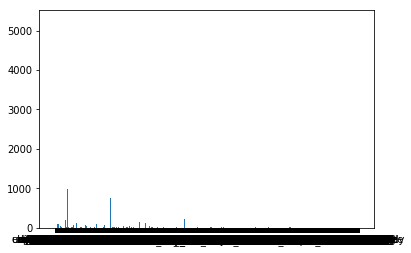

In [27]:
# Plotting word frequencies
plt.bar(range(len(wn_dict)), list(wn_dict.values()), align='center')
plt.xticks(range(len(wn_dict)), list(wn_dict.keys()))
plt.show()

In [28]:
wn_dict_copy = wn_dict.copy()

In [29]:
# Number of words for which frequency is less than num are chucked out
# [Selected 4 since it give the size that matches with paper]
num = 4
c = 0
for w, n in wn_dict_copy.items():
    if n < num:
        del wn_dict[w]
        c += 1

print(c)
print(len(wn_dict.keys()))

33466
21882


In [30]:
wn_unique_words = list(wn_dict.keys())

In [31]:
len(wn_unique_words)

21882

In [32]:
wn_gloss_matrix = bsr_matrix((len(wn_unique_words), len(wn_unique_words)), dtype=np.int8).toarray()
r = 0
for w in wn_unique_words:
    wn_words_around = []
    indices = [i for i, x in enumerate(wn_filtered_words) if x == w]
    for i in indices:
        wn_words_around.extend(wn_filtered_words[i - num_pos : i])
        wn_words_around.extend(wn_filtered_words[i + 1 : i + num_pos + 1])
    
    for word in wn_words_around:
        if word in wn_unique_words:
            index = wn_unique_words.index(word)
            wn_gloss_matrix[r][index] += 1
    
    r += 1

In [34]:
np.save('gloss_matrix.npz', wn_gloss_matrix)

In [39]:
print(wn_gloss_matrix[0])
print(wn_gloss_matrix[1])
print(wn_gloss_matrix[2])
print(wn_gloss_matrix[3])
print(wn_gloss_matrix[4])
print(wn_gloss_matrix[5])
print(wn_gloss_matrix[6])
print(wn_gloss_matrix[7])
print(wn_gloss_matrix[8])
print(wn_gloss_matrix[9])
print(wn_gloss_matrix[10])
print(wn_gloss_matrix[11])
print(wn_gloss_matrix[12])
print(wn_gloss_matrix[13])
print(wn_gloss_matrix[14])
print(wn_gloss_matrix[15])
print(wn_gloss_matrix[16])
print(wn_gloss_matrix[17])
print(wn_gloss_matrix[18])
print(wn_gloss_matrix[19])

[36 34  5 ...  0  0  0]
[33  6  3 ...  0  0  0]
[4 2 2 ... 0 0 0]
[11  2  7 ...  0  0  1]
[2 2 2 ... 0 0 0]
[3 3 2 ... 0 0 0]
[4 0 2 ... 0 0 0]
[59  5  6 ...  0  0  0]
[2 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[7 1 0 ... 0 0 0]
[12  0  1 ...  0  0  0]
[3 0 0 ... 0 0 0]
[3 0 0 ... 0 0 0]
[10  0  1 ...  0  0  0]
[7 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[2 1 2 ... 0 0 0]
[2 1 1 ... 0 0 0]
[4 1 0 ... 0 0 0]


In [41]:
print(wn_gloss_matrix[0][0:200])

[  36   34    5   12    2    3    4   59    2    0    7   12    3    3
   10    7    1    2    2    4   27    5    0    2    6    1    4    2
   24    7    3   11    1    0    4    3    3    3    6   39    3    1
    0   43    1   41    0   14    3    6    0    0    2    0    2    0
   15    6    1    4    0    2    3    0   18   12    2   11    0    0
   18    0    3    0    8   10    5    0   11   22    5    1 -119    0
    0    0    1   12    2   12    4    4    6    8    0    4    1    2
    5    9    5    0    1    0    0    0    2    7    5    0    9    0
    2    6    0    0    1    1    0    0    4    1    0   11    1    0
    1    0    0    0    3    0    2    6    8    2    2    0    0    3
    1    9    1    0    0    0    1    8    6    6   18    3   12    0
    3   12   14    0   17    2    0    1   13    2    2   31    1   15
    3    4   90    6    0    1    2    2    0   45   19    6    7    0
    2    0    8    0    7    0    4    2    0   16    1    0    0    5
    0 

In [60]:
serve = wn_gloss_matrix[wn_unique_words.index("serve")]
food = wn_gloss_matrix[wn_unique_words.index("food")]
tennis = wn_gloss_matrix[wn_unique_words.index("tennis")]
spoon = wn_gloss_matrix[wn_unique_words.index("spoon")]
player = wn_gloss_matrix[wn_unique_words.index("player")]


In [48]:
np.dot(serve, food)/(np.linalg.norm(serve)* np.linalg.norm(food))

0.010486153699040929

In [49]:
np.dot(serve, tennis)/(np.linalg.norm(serve)* np.linalg.norm(tennis))

0.010739438533865104

In [52]:
np.dot(spoon, food)/(np.linalg.norm(spoon)* np.linalg.norm(food))

0.0022386002864847104

In [53]:
np.dot(spoon, tennis)/(np.linalg.norm(spoon)* np.linalg.norm(tennis))

-0.09267989423009901

In [56]:
np.dot(player, food)/(np.linalg.norm(player)* np.linalg.norm(food))

0.0042699747141001915

In [57]:
np.dot(player, tennis)/(np.linalg.norm(player)* np.linalg.norm(tennis))

0.009580043853936973

In [58]:
np.save('wn_words.npz', wn_unique_words)

In [66]:
wn_dict_copy["jewel"]

3